In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Load Data

In [11]:
df = pd.read_csv("/content/credit_profiles.csv")
print(df.head())

      firm_id   sector     region  total_assets  debt_ratio  current_ratio  \
0  FIRM_00000  Finance  Singapore   4549.344645    0.901425       1.925685   
1  FIRM_00001   Retail      India   3105.903098    0.650124       1.184075   
2  FIRM_00002   Energy  Australia    556.793661    0.962467       2.787458   
3  FIRM_00003   Retail  Australia   1043.699472    0.405682       2.610487   
4  FIRM_00004   Retail  Singapore   7848.166678    0.461564       0.711528   

   credit_score  default_flag  
0    614.904027             0  
1    581.113441             0  
2    567.230541             0  
3    499.558040             1  
4    510.965530             1  


Drop ID column and set features/labels

In [12]:
X = df.drop(['firm_id', 'default_flag'], axis=1)
y = df['default_flag']

Standardize numeric features

In [13]:
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train-test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Logistic Regression


In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Predictions and Evaluation

In [16]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [8]:
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2075
           1       1.00      1.00      1.00       925

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

ROC AUC Score: 0.9999984369912082


Confusion Matrix

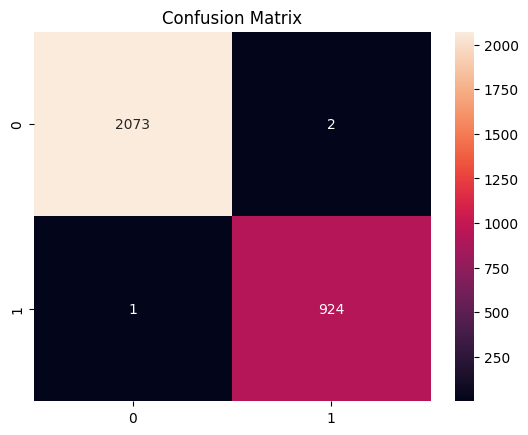

In [9]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
